# Задание

На главной странице Яндекса поменяли местами иконки "Маркет" и "Карты" над строкой поиска. 
Необходимо проверить повлияло ли изменение и стали ли пользователи чаще кликать на иконку "Маркета" по возвращению на сайт.


1. Проверьте гипотезу о кликабельности иконки с помощью метрики CTR (click-through-rate). Для CTR дана формула, СTR  = количество кликов / количество сессий.

2. Напишите выводы, которые можно сделать на основе анализа результатов

# Выводы

В ходе исследования проведен анализ кликабельности в контрольной и тестовой группе. 

Получено, что 
    - В группах А и В не изменилось распределение количества сессий на пользователя.
    - Кликабельность в группах А и В не изменилась в обоих рассчитанных случаях: по всем пользователям в среднем и для  каждого пользователя с последующим нахождением среднего.  
   
    
* Исследованные данные таковы, что на одну сессию может приходиться несколько кликов с разным id, поэтому показатель СTR в данном исследовании может быть больше 1. 

### Описание колонок данных

- user_id – идентификатор пользователя
- session_id – идентификатор сессии
- click_id – идентификатор клика
- experimentVariant – вариант эксперимента.

In [61]:
import pandas as pd

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn import datasets

from scipy import stats as st
from scipy.stats import shapiro
from scipy.stats import mannwhitneyu
from scipy.stats import ttest_ind
from scipy.stats import levene

import warnings
warnings.filterwarnings("ignore")

import seaborn as sns
sns.set_style("whitegrid")

## Содержание исследования

* [1. Знакомство с данными и их обработка](#the_destination)
* [2. Исследовательский анализ данных](#the_destination_1)
    * [2.1 Анализ количества сессий](#the_destination_1_1)
    * [2.2 Анализ количества кликов по сессиям](#the_destination_1_2)
* [3. Проверка гипотез ](#the_destination_2)
     *  [3.1 Оценка результатов А/В теста по CTR ](#the_destination_2_1)
     *  [3.2 Оценка результатов А/В теста по изменению количества кликов](#the_destination_2_2)
* [4. Выводы](#the_destination_5)

In [3]:
data_test = pd.read_csv('C:\\Users\\Елена\\Documents\\Python Scripts\\case_ctr.csv', sep = ';')

In [4]:
data_test[data_test['user_id'] == '01cff6d4d85a787f3648b025871f1e79']

,Unnamed: 0,user_id,session_id,click_id,experimentVariant
508,509,01cff6d4d85a787f3648b025871f1e79,2c9095d5d5a3b16d510e8a16dc09c123,6dbfc0b4a3f4e23e8415d7c698c41e42,0
8555,8556,01cff6d4d85a787f3648b025871f1e79,2c9095d5d5a3b16d510e8a16dc09c123,a3063520aafb04556e28cc8c1f1432e3,0


Интересное наблюдение в данных: для одного пользователя есть записи с одинаковыми сессиями, во время которых сделаны разные клики. Тогда интересно уточнить что является сессией и почему появляются разные клики, возможно такие записи правильно было бы удалить. 

<a id='the_destination'></a>
# 1. Знакомство с данными и их обработка

In [5]:
data_test.head(10)

,Unnamed: 0,user_id,session_id,click_id,experimentVariant
0,1,4299b8c9c50c3e4e8a067f448426463e,08f9c3b0e2ff8da7bad6cc200fa735a2,56bcee80ce68ddc58c178a63288965b2,1
1,2,863829e0fc8e0dcd88f44c6a63db836a,d0ebf6ddaa8702e6de4e46854a1136ff,b209c6b14e91606a99d637ff6eb74cc6,1
2,3,640af3312483bea44b8159a8caaf0b3d,838c4a718830b5f1ac7be5e70745ff47,3f3d510c709ae5d9bae0331fcf776f3a,1
3,4,43de481cae63944b81db6fd5567a12bb,8f36aead1ceafb3e67f9957a7765549e,da73306047217a73a6ee0ea7477f2ad7,0
4,5,b84dd1a6c3df2e08eb7bef496cdf6d39,09799cdf1394b0e4b86ace899b7f218e,6e4b93932be600a5536c291888996037,1
5,6,29a558e6a92687597f5633a244686d88,d7c8ddd76cfec46860bf44c79762ef08,ffb8e4f073828c6efd6b8ae5691c6480,0
6,7,7298fc49124c18b8565b3cc26e2a226f,d3822f21862e2ea63705ca35301f716c,NaN,0
7,8,17d2974b38e8cfd7f887e7cca9c26339,37791965b026a6051134857e7e8810ce,5df86ba51acb5d8efc477dd1c1aa9639,1
8,9,0c7df63f3072b3852ce1f38b54c6516a,d00aafdf5fedb568ebe8a43aa662ad23,5508c8c411f08c97497e5484d639d570,0
9,10,eb1569d025bb1fac5041838401eb32cc,76c532a0e78ad21121b50ea835b834ec,255da89ab2382caa21d2917223524be7,1


In [6]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
Unnamed: 0           10000 non-null int64
user_id              10000 non-null object
session_id           10000 non-null object
click_id             7655 non-null object
experimentVariant    10000 non-null int64
dtypes: int64(2), object(3)
memory usage: 390.8+ KB


<span style="color:blue"> **Незаполненные значения есть только в поле 'click_id', по-видимому связаны с тем, что клика во время сессии не было**.

In [7]:
data_test.duplicated().sum()

0

<span style="color:blue"> **Дубликатов нет**.

In [8]:
data_test.groupby('user_id').count().sort_values('session_id')

,Unnamed: 0,session_id,click_id,experimentVariant
user_id,,,,
7567632792e6e5a2b1aadf2313891588,1,1,1,1
e5bcf9ece250382026990fd9ec0752d2,1,1,1,1
4f0b395b7fdd4824327ed50d33556943,1,1,0,1
4ebea0a7271bc70b83a9ec10a7009d6e,1,1,1,1
e4b7f13af5e2961448aa0229304ac3ee,1,1,1,1
...,...,...,...,...
b142f1491ca9555d60503685e333030d,12,12,11,12
c5b28eefd597185ff31411971d46d2ce,13,13,11,13
45f8c7d7bd3f733e7d75b74ae816aace,13,13,12,13


**Разделим данные на 2 таблицы с группой А (experimentVariant = 0) и группой В ((experimentVariant = 1)**.

In [9]:
groupA = data_test[data_test['experimentVariant'] == 0]

In [10]:
groupB = data_test[data_test['experimentVariant'] == 1]

In [11]:
groupA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5112 entries, 3 to 9996
Data columns (total 5 columns):
Unnamed: 0           5112 non-null int64
user_id              5112 non-null object
session_id           5112 non-null object
click_id             3951 non-null object
experimentVariant    5112 non-null int64
dtypes: int64(2), object(3)
memory usage: 239.6+ KB


In [12]:
groupB.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4888 entries, 0 to 9999
Data columns (total 5 columns):
Unnamed: 0           4888 non-null int64
user_id              4888 non-null object
session_id           4888 non-null object
click_id             3704 non-null object
experimentVariant    4888 non-null int64
dtypes: int64(2), object(3)
memory usage: 229.1+ KB


**Определим количество уникальных пользователей в каждой группе**

In [13]:
groupA['user_id'].nunique()

1129

In [14]:
groupB['user_id'].nunique()

1117

In [15]:
group = pd.merge(left=groupA, right=groupB, left_on='user_id', right_on='user_id')

In [16]:
group.shape

(0, 9)

<span style="color:blue">**Пользователи разбиты на примерно одинаковые группы для тестирования, разница составляет 4%, что допустимо при проведение А/B теста**.

<span style="color:blue">**Пользователей с одинаковым user_id в двух группах нет**. 

<a id='the_destination_1'></a> 
# 2. Исследовательский анализ данных

<a id='the_destination_1_1'></a> 
**2.1 Определим, изменилось ли количесто сессий у пользователей в группах А и В. Также оценим наличие аномальных значений (выбросов) в количестве сессий у пользователей**

In [17]:
A_sess = groupA.groupby('user_id')['session_id'].count().reset_index()

In [18]:
A_sess_1 = A_sess.groupby('session_id').count().reset_index()

In [19]:
B_sess = groupB.groupby('user_id')['session_id'].count().reset_index()

In [20]:
B_sess_1 = B_sess.groupby('session_id').count().reset_index()

Text(0.5, 1.0, 'Распределение количества сессий на пользователя в группе В')

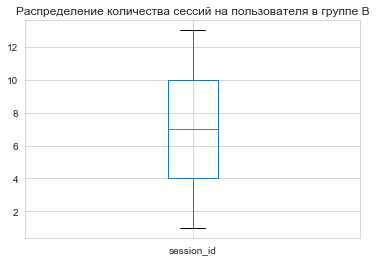

In [21]:
B_sess_1.boxplot('session_id')
plt.title('Распределение количества сессий на пользователя в группе В')

Text(0.5, 1.0, 'Распределение количества сессий на пользователя в группе A')

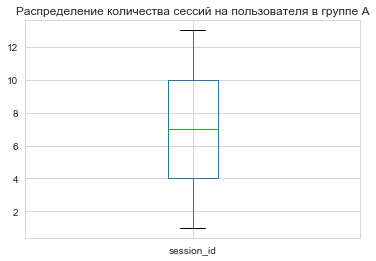

In [22]:
A_sess_1.boxplot('session_id')
plt.title('Распределение количества сессий на пользователя в группе A')

<span style="color:blue">**Аномальных значений в количестве сессий на пользователя в данных нет**

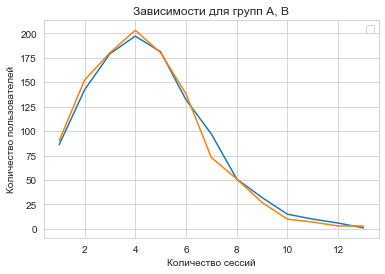

In [23]:
plt.title('Зависимости для групп A, B') # заголовок
plt.xlabel('Количество сессий') # ось абсцисс
plt.ylabel('Количество пользователей') # ось ординат
plt.legend(['A', 'B'])
plt.plot(A_sess_1['session_id'], A_sess_1['user_id'], B_sess_1['session_id'], B_sess_1['user_id']) # построение графика

<span style="color:blue"> **Распределение количества сессий по количеству пользователей в группах А и В по графику очень близкое.**
 


<a id='the_destination_1_2'></a>
**2.2 Сравним как распределено количество кликов по сессиям в группах**

In [24]:
A3 = groupA.groupby(['user_id','session_id'])['click_id'].count()\
  .reset_index()\
  .rename_axis([None], axis=1)

In [25]:
B3 = groupB.groupby(['user_id','session_id'])['click_id'].count()\
  .reset_index()\
  .rename_axis([None], axis=1)

Text(0.5, 0.98, 'Распределение количества кликов за сессию')

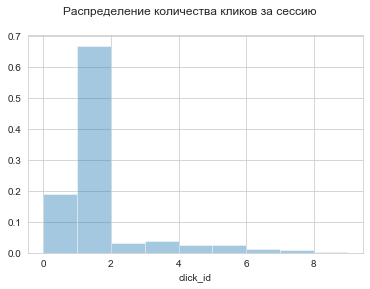

In [53]:
sns.distplot(A3['click_id'], bins=range(0, 10), kde=False, norm_hist=True)

plt.suptitle("Распределение количества кликов за сессию")

Text(0.5, 0.98, 'Распределение количества кликов за сессию')

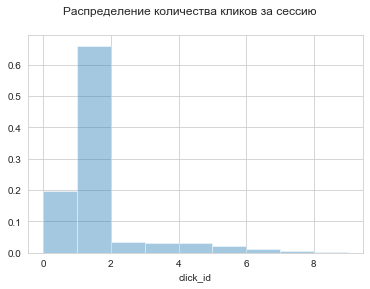

In [52]:
sns.distplot(B3['click_id'], bins=range(0, 10), kde=False, norm_hist=True)
plt.suptitle("Распределение количества кликов за сессию")

<span style="color:blue"> **В обеих группах близкое распределение количества кликов за сессию.**

<a id='the_destination_2'></a>
# 3. Проверка гипотез

<a id='the_destination_2_1'></a>
**3.1 Оценка результатов А/В теста по CTR**

In [27]:
def count_metrics(X):
    metric_cols = {
        'session_cnt': X['session_id'].nunique(),
        'clics_cnt': X['click_id'].nunique(),
        'ctr_person': X['click_id'].nunique() / X['session_id'].nunique()}
    return pd.Series(metric_cols)

In [28]:
groupA_test = groupA.groupby(['user_id']).apply(count_metrics).reset_index()

In [29]:
groupA_test.head(10)

,user_id,session_cnt,clics_cnt,ctr_person
0,002919af9552c77035b1da1a23988191,7.0,6.0,0.857143
1,0036ea1469ecd0808170f942533513a2,5.0,3.0,0.600000
2,00b31c2f7dfc7b377abe7e1bd2ac060e,1.0,2.0,2.000000
3,01308b1cb36f52772b2ca6aa2fedd2e3,1.0,3.0,3.000000
4,014a6b3970d823d330a583d674e18f9c,5.0,3.0,0.600000
5,015b1d3aff22840c0941e2a4173e9dc7,1.0,6.0,6.000000
6,01772c1893135e1de7ab6715ec6f136d,5.0,4.0,0.800000
7,018408bc75dff5cdab735aa7fb326f0b,1.0,1.0,1.000000
8,0199e857f7f12436720817047ed14997,3.0,3.0,1.000000
9,01cff6d4d85a787f3648b025871f1e79,1.0,2.0,2.000000


In [30]:
groupB_test = groupB.groupby(['user_id']).apply(count_metrics).reset_index()

In [31]:
groupA_test['ctr_person'].agg('mean')  

2.0712237349305553

In [32]:
groupB_test['ctr_person'].agg('mean')   

1.9811365795251201

In [33]:
groupA_ctr = groupA_test.clics_cnt.sum() / groupA_test.session_cnt.sum()
groupA_ctr

1.2343017806935332

In [34]:
groupB_ctr = groupB_test.clics_cnt.sum() / groupB_test.session_cnt.sum()
groupB_ctr

1.2096668843892882

Text(0.5, 0.98, 'Распределение количества кликов за сессию')

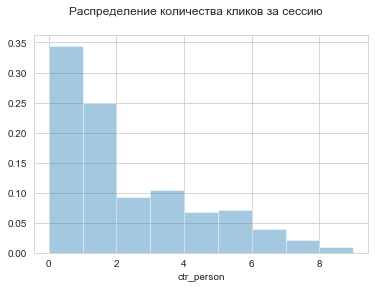

In [55]:
sns.distplot(groupA_test['ctr_person'], bins=range(0, 10), kde=False, norm_hist=True)
plt.suptitle("Распределение количества кликов за сессию")

Text(0.5, 0.98, 'Распределение количества кликов за сессию')

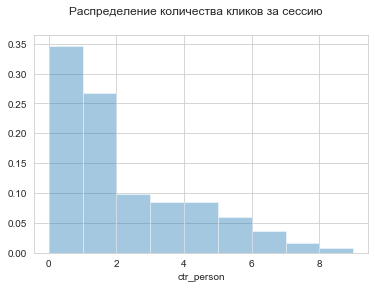

In [56]:
sns.distplot(groupB_test['ctr_person'], bins=range(0, 10), kde=False, norm_hist=True)
plt.suptitle("Распределение количества кликов за сессию")

 Метрику СTR посчитали двумя способами:
    * 1 - как среднее значение для всех пользователей
         А: 1.23
         В: 1.21
    * 2 - для каждого пользователя в отдельности и затем нашли среднее
         А: 2.07
         В: 1.98
          
 <span style="color:blue">**Исходя из цифр, кликабельность в группах изменилась мало, но надо оценить статистическую значимость полученных результатов**. 

Для того, чтобы оценить статистическую значимость результата по метрике CTR, проведем линеаризацию. Необходимость в ней связана с тем, что метрика кликабельности зависит от двух переменных, которые могут быть распределены по разному. 

In [35]:
def linearization (x_0, y_0, x_1, y_1):
    k = x_0.sum() / y_0.sum()
    l_0 = x_0 - k * y_0
    l_1 = x_1 - k * y_1
    return l_0, l_1

In [36]:
l_0, l_1 = linearization (groupA_test.clics_cnt, groupA_test.session_cnt, groupB_test.clics_cnt, groupB_test.session_cnt)

Сформулируем нулевую гипотезу:
   * H0: Средние значения двух выборок равны.
   * H1: Средние значения двух выборок не равны.

In [57]:
alpha=.05
stat, result1 = ttest_ind(l_0, l_1, equal_var = False)
print(result1)
if (result1 < alpha):
    print('Средние значения двух выборок не равны')
else:
    print('Нулевая гипотеза о равенстве средних значений двух выборок не может быть отклонена')

0.5496827925600947
Нулевая гипотеза о равенстве средних значений двух выборок не может быть отклонена


In [58]:
alpha=.05
stat, result2 = ttest_ind(groupA_test.ctr_person, groupB_test.ctr_person, equal_var = False)
print(result2)
if (result2 < alpha):
    print('Средние значения двух выборок не равны')
else:
    print('Нулевая гипотеза о равенстве средних значений двух выборок не может быть отклонена')

0.2567490406565845
Нулевая гипотеза о равенстве средних значений двух выборок не может быть отклонена


 <span style="color:blue"> **При выбранном уровне значимости при любом способе расчета CTR кликабельность не изменилась**.

<a id='the_destination_5'></a>
# 4. Выводы

В ходе исследования проведен анализ кликабельности в контрольной и тестовой группе. Получено, что 
    - В группах А и В не изменилось распределение количества сессий на пользователя.
    - Кликабельность в группах А и В не изменилась в обоих рассчитанных случаях: по всем пользователям в среднем и для каждого пользователя с последующим нахождением среднего. 